In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [4]:
from sklearn import metrics

In [7]:
!pip install mlxtend

In [5]:
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [9]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [10]:
w1 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W1.csv")
w2 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W2.csv")
w3 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W3.csv")
w4 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W4.csv")
w5 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W5.csv")
w6 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W6.csv")
w7 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W7.csv")
w8 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W8.csv")
w9 = pd.read_csv("C:/Users/HP/Desktop/AI_miniProj/stat_W9.csv")

In [11]:
#datasets arranged in ascending order of size
datasets = [w9, w5, w7, w3, w6, w2, w1, w4, w8]

In [12]:
for i in datasets:
  i.dropna(axis = 0, inplace = True)
  i.drop("Unnamed: 0", axis = 1, inplace = True)

In [13]:
data = pd.DataFrame()
for i in datasets:
  data = pd.concat([data, i],ignore_index = True)

In [14]:
data

,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,0_ECDF_4,0_ECDF_5,...,7_Mean,7_Mean absolute deviation,7_Median,7_Median absolute deviation,7_Min,7_Root mean square,7_Skewness,7_Standard deviation,7_Variance,Wear
0,300.0,1200.0,-200.970,114.84,0.000667,0.001333,0.002,0.002667,0.003333,0.004,...,-0.786447,1.090869,-1.3824,0.4073,-2.0541,1.517567,0.943873,1.297886,1.684509,0.065
1,300.0,1200.0,-143.550,172.26,0.000667,0.001333,0.002,0.002667,0.003333,0.004,...,1.205540,0.509679,1.4864,0.2080,-0.0997,1.345519,-0.895774,0.597574,0.357095,0.065
2,300.0,1200.0,-114.840,200.97,0.000667,0.001333,0.002,0.002667,0.003333,0.004,...,-1.190222,0.621008,-1.4777,0.2080,-2.0454,1.499077,2.060872,0.911374,0.830602,0.065
3,300.0,1200.0,-100.480,229.68,0.000667,0.001333,0.002,0.002667,0.003333,0.004,...,0.654409,1.146077,1.4431,0.3380,-1.3694,1.399811,-0.666822,1.237425,1.531220,0.065
4,300.0,1200.0,-86.129,229.68,0.000667,0.001333,0.002,0.002667,0.003333,0.004,...,0.338624,1.101911,0.8190,0.2795,-1.9154,1.350247,-0.732292,1.307096,1.708500,0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237,300.0,1200.0,-35.887,236.85,0.000667,0.001333,0.002,0.002667,0.003333,0.004,...,1.372066,0.367712,1.1310,0.0216,1.1007,1.449996,1.699431,0.468960,0.219924,0.245
5238,300.0,1200.0,-50.242,251.21,0.000667,0.001333,0.002,0.002667,0.003333,0.004,...,0.067732,1.327533,1.0877,0.2253,-1.7681,1.365924,-0.435119,1.364244,1.861161,0.245
5239,300.0,1200.0,-35.887,265.56,0.000667,0.001333,0.002,0.002667,0.003333,0.004,...,-1.591125,0.068263,-1.5687,0.0606,-1.7161,1.593035,0.170314,0.077998,0.006084,0.245
5240,300.0,1200.0,-35.887,265.56,0.000667,0.001333,0.002,0.002667,0.003333,0.004,...,-0.789850,0.501190,-0.8320,0.5590,-2.0584,0.986554,-0.733771,0.591122,0.349426,0.245


In [15]:
data.to_csv("stat_dataset.csv")

#Feature Selection

In [16]:
!pip install feature_engine

In [18]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score, r2_score
from sklearn import metrics


In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    data.iloc[:,0:-1],
    data.iloc[:,-1],
    test_size=0.3,
    random_state=0)
X_train.shape, X_test.shape

((3669, 288), (1573, 288))

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [21]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
X_train = pd.DataFrame(data = X_train, columns = data.columns[:-1])
X_test = pd.DataFrame(data = X_test, columns = data.columns[:-1])

In [23]:
X_train


,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,0_ECDF_2,0_ECDF_3,0_ECDF_4,0_ECDF_5,...,7_Max,7_Mean,7_Mean absolute deviation,7_Median,7_Median absolute deviation,7_Min,7_Root mean square,7_Skewness,7_Standard deviation,7_Variance
0,0.016511,0.016511,0.191422,0.519888,-1.084202e-19,2.168404e-19,-8.673617e-19,4.336809e-19,4.336809e-19,-1.734723e-18,...,-0.305699,-1.369983,-1.011954,-1.131517,-0.969615,-2.284588,1.011258,0.613592,-0.354014,-0.547985
1,0.016511,0.016511,1.116250,1.029714,-1.084202e-19,2.168404e-19,-8.673617e-19,4.336809e-19,4.336809e-19,-1.734723e-18,...,0.529619,1.318120,-0.676444,1.266787,-0.724071,1.312078,0.760908,-1.288992,-0.545001,-0.684666
2,0.016511,0.016511,-0.836101,-0.499624,-1.084202e-19,2.168404e-19,-8.673617e-19,4.336809e-19,4.336809e-19,-1.734723e-18,...,0.716010,-0.274151,1.636446,-0.760477,0.975134,-0.435736,0.177947,0.522545,1.598403,1.882844
3,0.016511,0.016511,1.732793,1.845380,-1.084202e-19,2.168404e-19,-8.673617e-19,4.336809e-19,4.336809e-19,-1.734723e-18,...,1.678171,1.327946,-0.317189,1.299886,-0.366072,1.210826,1.040557,-0.595751,-0.153452,-0.385055
4,0.016511,0.016511,0.396941,0.519888,-1.084202e-19,2.168404e-19,-8.673617e-19,4.336809e-19,4.336809e-19,-1.734723e-18,...,0.585554,0.153959,1.199715,-0.333178,1.042194,0.272602,-0.857498,0.382853,0.989249,0.922334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3664,0.016511,0.016511,1.527288,1.437547,-1.084202e-19,2.168404e-19,-8.673617e-19,4.336809e-19,4.336809e-19,-1.734723e-18,...,-0.238578,0.527386,-1.553173,0.441923,-1.192977,1.877771,-3.116419,3.807270,-1.752493,-1.131754
3665,0.016511,0.016511,2.554854,2.661046,-1.084202e-19,2.168404e-19,-8.673617e-19,4.336809e-19,4.336809e-19,-1.734723e-18,...,-1.405803,-0.928479,-0.623073,-0.704217,0.483530,-0.937006,-0.982877,-0.483138,-0.668514,-0.763465
3666,0.016511,0.016511,0.294189,0.417894,-1.084202e-19,2.168404e-19,-8.673617e-19,4.336809e-19,4.336809e-19,-1.734723e-18,...,0.149264,-0.867684,1.071287,-1.267350,-0.612132,-0.601305,0.762265,0.828564,1.232033,1.283185
3667,0.016511,0.016511,-1.658177,-1.927110,-1.084202e-19,2.168404e-19,-8.673617e-19,4.336809e-19,4.336809e-19,-1.734723e-18,...,0.070870,0.253168,0.520210,0.521421,-0.097831,-0.495489,-1.368761,-0.740223,0.598514,0.402718


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  84


In [26]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((3669, 204), (1573, 204))

In [27]:
sfs = SFS(RandomForestRegressor(n_estimators=10, n_jobs=4, random_state=10), 
           k_features=20, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=2)

sfs = sfs.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 204 out of 204 | elapsed:   15.7s finished

[2023-04-02 16:45:40] Features: 1/20 -- score: 0.5596438869925654[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 203 out of 203 | elapsed:   19.1s finished

[2023-04-02 16:45:59] Features: 2/20 -- score: 0.7223458847649655[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 202 out of 202 | elapsed:   22.2s finished

[2023-04-02 16:46:21] Features: 3/20 -- score: 0.786379232736915[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [28]:
sfs.k_feature_idx_

(0,
 1,
 44,
 52,
 53,
 70,
 72,
 73,
 74,
 75,
 77,
 79,
 90,
 91,
 97,
 98,
 114,
 115,
 146,
 149)

In [30]:
k_features = (0,
 1,
 44,
 52,
 53,
 70,
 72,
 73,
 74,
 75,
 77,
 79,
 90,
 91,
 97,
 98,
 114,
 115,
 146,
 149)

In [31]:
X_train.columns[list(k_features)]

Index(['0_ECDF Percentile Count_0', '0_ECDF Percentile_0', '1_Histogram_1',
       '2_ECDF Percentile_0', '2_ECDF Percentile_1', '2_Mean', '2_Median',
       '2_Min', '2_Skewness', '3_ECDF Percentile Count_0',
       '3_ECDF Percentile_0', '3_ECDF_0', '3_Histogram_1', '3_Histogram_2',
       '3_Min', '3_Skewness', '4_Histogram_3', '4_Histogram_4', '5_Mean',
       '6_ECDF Percentile Count_0'],
      dtype='object')

In [35]:
def run_randomForests(X_train, X_test, y_train, y_test): 
    rf = RandomForestRegressor(n_estimators=10, random_state=10)
    rf.fit(X_train, y_train)
    print('Train set')
    pred = rf.predict(X_train)
    print('Random Forests roc-auc: {}'.format(r2_score(y_train, pred)))
    print('Test set')
    pred = rf.predict(X_test)
    print('Random Forests roc-auc: {}'.format(r2_score(y_test, pred)))

In [36]:
selected_feat = X_train.columns[list(k_features)]

In [37]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9718951344430296
Test set
Random Forests roc-auc: 0.8890884944382905


#Applying ML Algorithms


##Multiple Regression

Model Selection

##Random Forest Regressor

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'bootstrap': [True],
    'max_depth': [ 90, 100, 110],
    'max_features': [ 3],
    'min_samples_leaf': [ 4, 5],
    'min_samples_split': [ 10, 12],
    'n_estimators': range(1,100,10)
}

rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [39]:

grid_search.fit(X_train[selected_feat], y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [90, 100, 110],
                         'max_features': [3], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [10, 12],
                         'n_estimators': range(1, 100, 10)},
             verbose=2)

In [40]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 71}

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=71, max_depth = 90,max_features = 3,min_samples_leaf = 4,min_samples_split = 10 ,random_state=10)
rf.fit(X_train[selected_feat], y_train)

RandomForestRegressor(max_depth=90, max_features=3, min_samples_leaf=4,
                      min_samples_split=10, n_estimators=71, random_state=10)

In [93]:
predictions = rf.predict(X_test[selected_feat])

In [94]:
print('MAE: ', metrics.mean_absolute_error(y_test, predictions))
print('MSE: ', metrics.mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score: ', metrics.r2_score(y_test, predictions))

MAE:  0.013355735078306296
MSE:  0.00039067104909133325
RMSE:  0.01976540030182372
R2 score:  0.8685419403633204


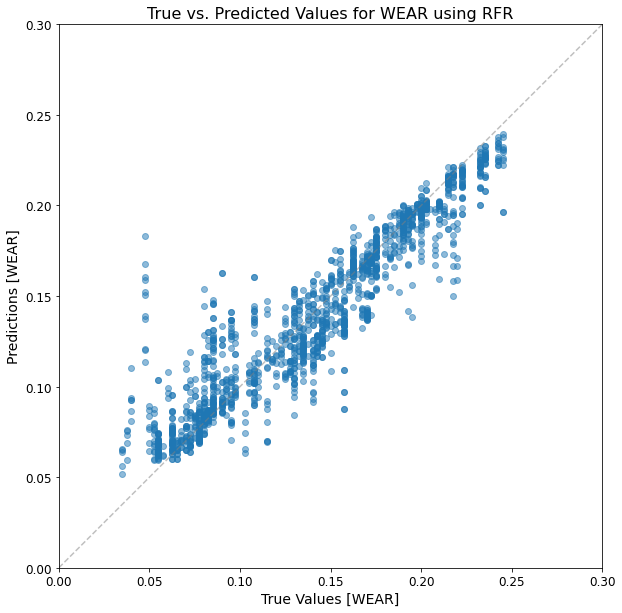

In [95]:
import matplotlib.pyplot as plt

# create the scatter plot
plt.figure(figsize = (10,10))
a = plt.axes(aspect='equal')
plt.scatter(y_test, predictions, alpha=0.5)

# set the title and labels for the plot
plt.title('True vs. Predicted Values for WEAR using RFR', fontsize=16)
plt.xlabel('True Values [WEAR]', fontsize=14)
plt.ylabel('Predictions [WEAR]', fontsize=14)

# set the font size and weight for the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# set the x and y limits of the plot
lims = [0, 0.30]
plt.xlim(lims)
plt.ylim(lims)

# add a diagonal line to the plot
_ = plt.plot(lims, lims, linestyle='--', color='gray', alpha=0.5)

# display the plot
plt.show()



In [57]:
from sklearn.tree import DecisionTreeRegressor

In [67]:
param_grid = {
            "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
}



In [79]:
dtr = DecisionTreeRegressor()

In [80]:
grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [81]:
grid_search.fit(X_train[selected_feat], y_train)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'splitter': ['best', 'random']},
             verbose=2)

In [82]:
grid_search.best_params_

{'max_depth': 11,
 'max_features': None,
 'max_leaf_nodes': None,
 'splitter': 'best'}

In [86]:
dtr = DecisionTreeRegressor(max_depth = 12, max_features = 'auto', splitter = 'best')
dtr.fit(X_train[selected_feat], y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=12, max_features='auto')

In [87]:
predictions = dtr.predict(X_test[selected_feat])

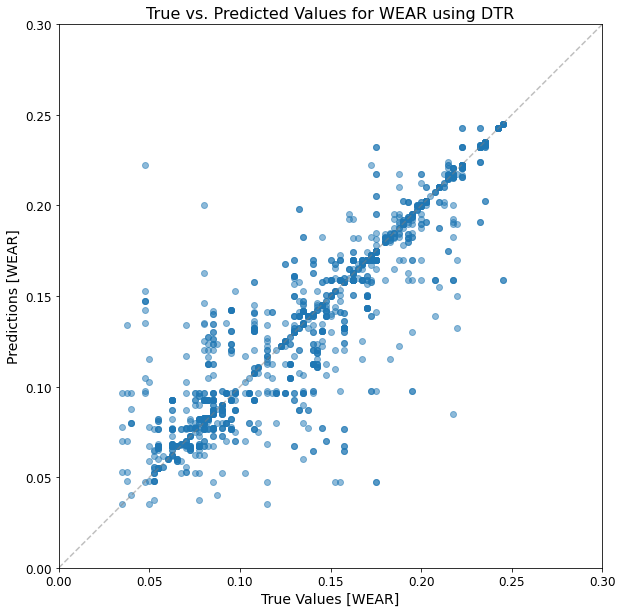

In [92]:
import matplotlib.pyplot as plt

# create the scatter plot
plt.figure(figsize = (10,10))
a = plt.axes(aspect='equal')
plt.scatter(y_test, predictions, alpha=0.5)

# set the title and labels for the plot
plt.title('True vs. Predicted Values for WEAR using DTR', fontsize=16)
plt.xlabel('True Values [WEAR]', fontsize=14)
plt.ylabel('Predictions [WEAR]', fontsize=14)

# set the font size and weight for the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# set the x and y limits of the plot
lims = [0, 0.30]
plt.xlim(lims)
plt.ylim(lims)

# add a diagonal line to the plot
_ = plt.plot(lims, lims, linestyle='--', color='gray', alpha=0.5)

# display the plot
plt.show()

